## Objetivo
Analizar el comportamiento de clientes para identificar patrones asociados a la cancelación del servicio (churn), como base para entrenar un modelo predictivo.

# A. Preparar datos para el modelado (tratamiento, codificación, normalización).

##📌 1-Extracción

###Fuente: Data Set de Kaggle: Telco Customer Churn – https://www.kaggle.com/datasets/blastchar/telco-customer-churn
URL_archivo = 'https://raw.githubusercontent.com/Rapd33/Proyecto-Hackaton-ONE-Equipo46/989ca82dbfaa72f74227b8af15068d6fcf401765/DataScience/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv' #Ruta donde se aloja el archivo CSV en GitHub.

Formato uniforme destino: DataFrame

In [8]:
#Importar Librerías:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#archivo = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv' #Establece una variable archivo con la ruta del archivo CSV .
URL_archivo = 'https://raw.githubusercontent.com/Rapd33/Proyecto-Hackaton-ONE-Equipo46/989ca82dbfaa72f74227b8af15068d6fcf401765/DataScience/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv' #Establece una variable archivo con la ruta donde se aloja el archivo CSV en GitHub.


df = pd.read_csv(URL_archivo)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##🔧 2-Transformación y Limpieza de datos

### Conociendo el conjunto de datos

In [9]:
#Cantidad de Filas y columnas
df.shape

(7043, 21)

In [10]:
# Columnas
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Diccionario de Datos

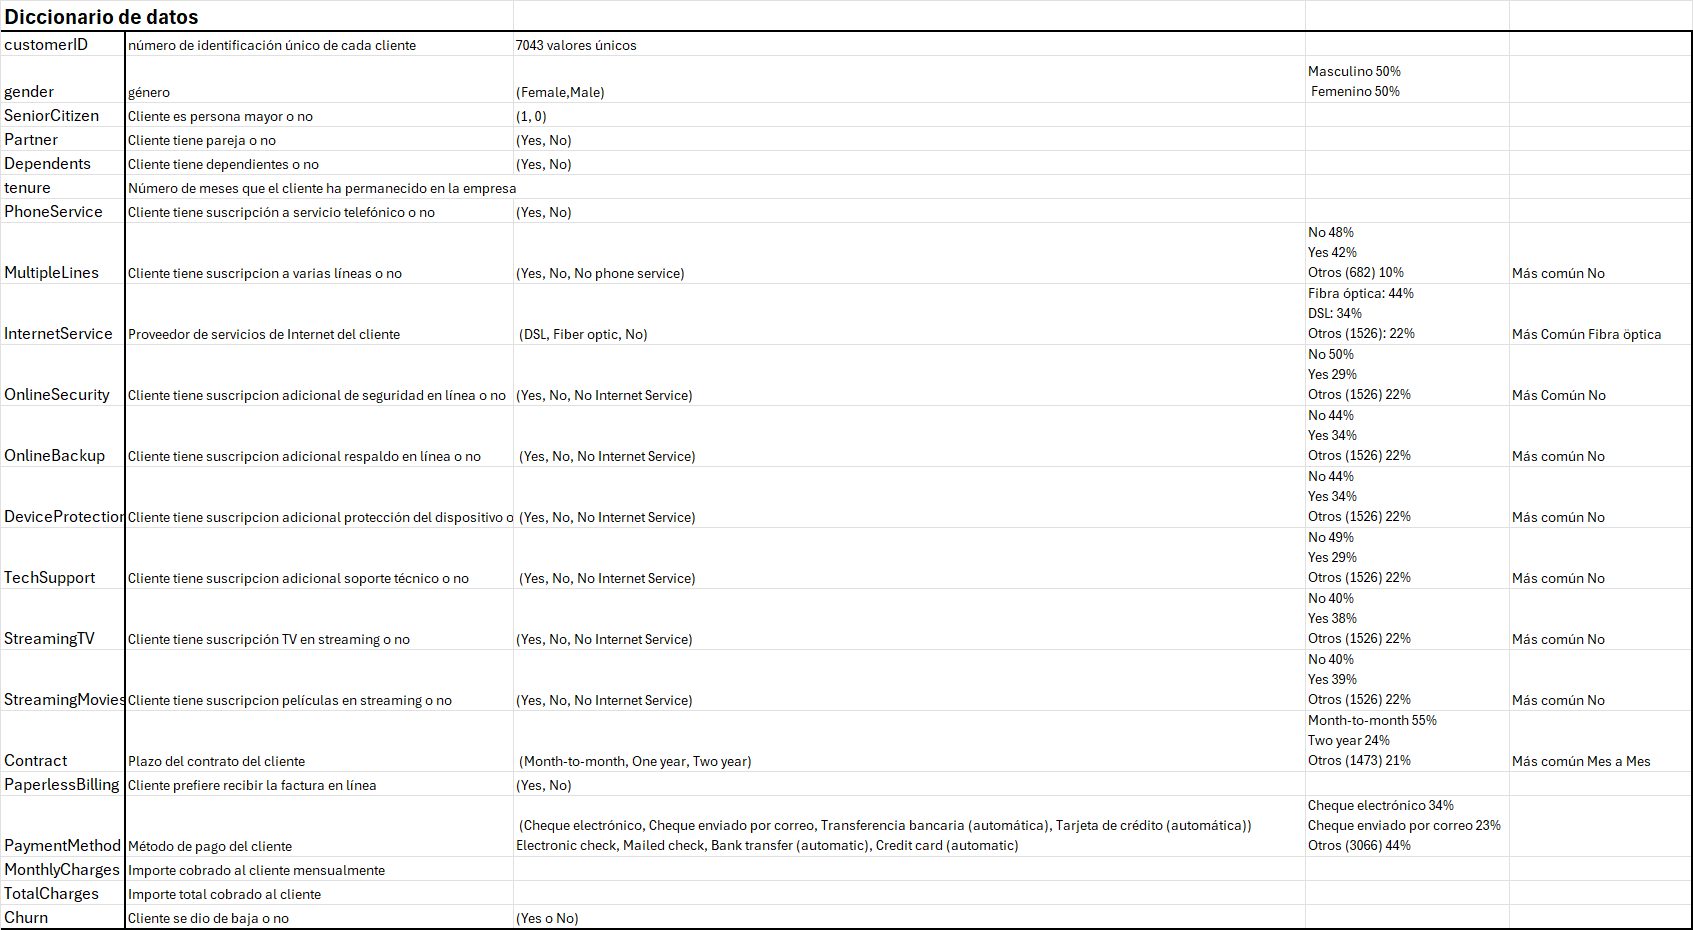

### Validar Calidad de los datos

### 1.Valores unicos

In [12]:
# Validar valores únicos por columna
for col in df.columns: # columns values unique:
  print(f"Columna '{col}': {df[col].nunique()}")
  if df[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(df[col].unique()))

  print('-' * 60) # dividir secciones

Columna 'customerID': 7043
------------------------------------------------------------
Columna 'gender': 2
gender: ['Female' 'Male']
------------------------------------------------------------
Columna 'SeniorCitizen': 2
SeniorCitizen: [0 1]
------------------------------------------------------------
Columna 'Partner': 2
Partner: ['Yes' 'No']
------------------------------------------------------------
Columna 'Dependents': 2
Dependents: ['No' 'Yes']
------------------------------------------------------------
Columna 'tenure': 73
------------------------------------------------------------
Columna 'PhoneService': 2
PhoneService: ['No' 'Yes']
------------------------------------------------------------
Columna 'MultipleLines': 3
MultipleLines: ['No phone service' 'No' 'Yes']
------------------------------------------------------------
Columna 'InternetService': 3
InternetService: ['DSL' 'Fiber optic' 'No']
------------------------------------------------------------
Columna 'OnlineSe

### 2.Números duplicados

In [13]:
# Validar si hay numeros duplicado
duplicados = df.duplicated()
print(duplicados.sum())


0


### 3.Valores nulos

In [14]:
## Identificar valores nulos
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [15]:
# Validar si hay valores nulos
valores_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])


Valores nulos por columna:
Series([], dtype: int64)


### 4.Valores en blanco o vacios

In [16]:
# Validar si hay valores en blanco o vacios
valores_vacios = df.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(valores_vacios[valores_vacios > 0])

TotalCharges    11
dtype: int64


Validando o detectando anomalias

In [17]:
df['TotalCharges'].unique()[:20]

array(['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5',
       '1949.4', '301.9', '3046.05', '3487.95', '587.45', '326.8',
       '5681.1', '5036.3', '2686.05', '7895.15', '1022.95', '7382.25',
       '528.35', '1862.9'], dtype=object)

Se observa que este campo es de tipo string aunque sus valores se ven como números con decimales

In [18]:
# 11 regisros en la columna TotalCharges
# posibles clientes raros
df[df['TotalCharges'].str.strip() == ''][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]

,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,
753,3115-CZMZD,0,20.25,
936,5709-LVOEQ,0,80.85,
1082,4367-NUYAO,0,25.75,
1340,1371-DWPAZ,0,56.05,
3331,7644-OMVMY,0,19.85,
3826,3213-VVOLG,0,25.35,
4380,2520-SGTTA,0,20.00,
5218,2923-ARZLG,0,19.70,
6670,4075-WKNIU,0,73.35,


### 5.Tipos de datos

##### Campo TotalCharges de object a float

In [19]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [20]:
# estos son clientes nuevos que no tienen permanencia o
df[df['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'Churn']].head(10)

,tenure,MonthlyCharges,Churn


Proceder a colocar con ceros los socios que tienen total charges null

In [21]:
#df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [22]:
# Reemplazar las cadenas vacías en la columna 'account.Charges.Total' con 0
df['TotalCharges'] = df['TotalCharges'].astype(str).str.strip().replace('', '0')

In [23]:
# Convertir la columna TotalCharges a tipo float
df['TotalCharges'] = df['TotalCharges'].astype(np.float64)
display(df.dtypes)




,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [24]:
#Validando
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


###Estandarizacion - Renombrar Columnas

In [25]:
'''
df.rename(columns={
    "customerID": "ID_Cliente",
    "gender": "Genero",
    "SeniorCitizen": "Adulto_Mayor",
    "Partner": "Tiene_Pareja",
    "Dependents": "Tiene_Dependientes",
    "tenure": "Meses_Contrato",
    "PhoneService": "Suscripcion_Servicio_Telefono",
    "MultipleLines": "Suscripcion_Multiples_Lineas",
    "InternetService": "Suscripcion_Servicio_Internet",
    "OnlineSecurity": "Suscripcion_Seguridad_En_Linea",
    "OnlineBackup": "Suscripcion_Respaldo_En_Linea",
    "DeviceProtection": "Suscripcion_Proteccion_Dispositivo",
    "TechSupport": "Suscripcion_Soporte_Técnico",
    "StreamingTV": "Suscripcion_TV_Streaming",
    "StreamingMovies": "Suscripcion_Películas_Streaming",
    "Contract": "Tipo_Contrato",
    "PaperlessBilling": "Factura_Electronica",
    "PaymentMethod": "Metodo_Pago",
    "MonthlyCharges": "Factura_Mensual",
    "TotalCharges": "Cargos_Totales",
    "Churn": "Cancelacion",
}, inplace=True)
'''

'\ndf.rename(columns={\n    "customerID": "ID_Cliente",\n    "gender": "Genero",\n    "SeniorCitizen": "Adulto_Mayor",\n    "Partner": "Tiene_Pareja",\n    "Dependents": "Tiene_Dependientes",\n    "tenure": "Meses_Contrato",\n    "PhoneService": "Suscripcion_Servicio_Telefono",\n    "MultipleLines": "Suscripcion_Multiples_Lineas",\n    "InternetService": "Suscripcion_Servicio_Internet",\n    "OnlineSecurity": "Suscripcion_Seguridad_En_Linea",\n    "OnlineBackup": "Suscripcion_Respaldo_En_Linea",\n    "DeviceProtection": "Suscripcion_Proteccion_Dispositivo",\n    "TechSupport": "Suscripcion_Soporte_Técnico",\n    "StreamingTV": "Suscripcion_TV_Streaming",\n    "StreamingMovies": "Suscripcion_Películas_Streaming",\n    "Contract": "Tipo_Contrato",\n    "PaperlessBilling": "Factura_Electronica",\n    "PaymentMethod": "Metodo_Pago",\n    "MonthlyCharges": "Factura_Mensual",\n    "TotalCharges": "Cargos_Totales",\n    "Churn": "Cancelacion",\n}, inplace=True)\n'

In [26]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


####🚧Remover columnas irrelevantes

Excluir variables que:

- No tienen valor predictivo.
- Son redundantes con otras.
- Pueden causar fuga de datos.

In [27]:
# ID Identificador de Cliente
df = df.drop(columns=['customerID'])

####🚧Agrupación de No y No service

    🎯 Objetivo

    Reducir *multicolinealidad* y simplificar los datos sin perder relevancia para el modelo predictivo.

    Varias variables de suscripcion, tenían tres categorías:

    "Yes" → cliente usa el servicio
    "No" → cliente tiene internet, pero no contrató el servicio
    "No internet service" → cliente ni siquiera tiene internet, por lo tanto no puede usar el servicio

    Esto generaba multicolinealidad perfecta al transformar estas categorías en dummies, lo que:

    Creaba correlación 1.0 entre variables
    Generaba VIF infinito
    Comprometía la estabilidad y el rendimiento de los modelos
    ✅ La solución: agrupar "No internet service" como "No"

    "Yes" = usa el servicio
    "No" = no usa el servicio (por cualquier motivo)

    Esto reduce la dimensionalidad y evita multicolinealidad.


In [28]:
# creacion df copia para depurar datos
df_depurado = df.copy()

In [29]:
# 1: Agrupar "No internet service" como "No"
columns_suscripcion = [
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies'

]

# Todas las suscripciones anteriores tienen los valores ['No' 'Yes' 'No internet service']
# No se incluye el campo 'Suscripcion_Multiples_Lineas' porque tiene estos valores y no se puede unificar el ultimo con No ['No' 'Yes' 'No phone service']

for col in columns_suscripcion:
    df_depurado[col] = df_depurado[col].replace('No internet service', 'No')

In [30]:
# Verificación
for col in columns_suscripcion:
    print(f"{col}: {df_depurado[col].unique()}")
print(f"{'MultipleLines'}: {df_depurado['MultipleLines'].unique()}")

OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']


In [31]:
df_depurado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 




####🚧One-hot encoding

In [32]:
# 2: One-hot encoding (sin dummy trap)
# técnica de codificación que permite convertir datos categóricos en vectores numéricos aprovechables por los modelos de machine learning
columns_procesar = [
'Churn',
'gender',
'Partner',
'Dependents',
'PhoneService',
'MultipleLines',
'InternetService',
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies',
'Contract',
'PaperlessBilling',
'PaymentMethod'
]

In [33]:
# Verificación valores de estas columnas a procesar
for col in columns_procesar:
    print(f"{col}: {df_depurado[col].unique()}")

Churn: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


####🚧Variables Categoricas - object - aplicar codificación "one-hot"

In [34]:
# Columnas Categoricas
columns_categoricas = df_depurado.select_dtypes(include='object').columns
print(f"Columnas categoricas:  {columns_categoricas}")

# Columnas Numericas
columns_numericas = [
  'SeniorCitizen',
  'tenure'
]
print(f"\n Columnas númericas:  {columns_numericas}")




Columnas categoricas:  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

 Columnas númericas:  ['SeniorCitizen', 'tenure']


In [59]:
# Numero columnas iniciales en el Data Frame
cantidad_columnas_iniciales = len(df_depurado.columns)

df_encoded = pd.get_dummies(df_depurado, columns=columns_categoricas, drop_first=True)

# Numero columnas despues de ejecutar la codificacion "one-hot"
cantidad_columnas_codificadas = len(df_encoded.columns)

In [36]:
# Estructura
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   bool   
 5   Partner_Yes                            7043 non-null   bool   
 6   Dependents_Yes                         7043 non-null   bool   
 7   PhoneService_Yes                       7043 non-null   bool   
 8   MultipleLines_No phone service         7043 non-null   bool   
 9   MultipleLines_Yes                      7043 non-null   bool   
 10  InternetService_Fiber optic            7043 non-null   bool   
 11  Inte

In [37]:
print(f" Q_Columnas_Iniciales: {cantidad_columnas_iniciales}")
print(f" Q_Columnas_Codificadas: {cantidad_columnas_codificadas}")
len(df_encoded.columns)

 Q_Columnas_Iniciales: 20
 Q_Columnas_Codificadas: 25


25

In [38]:
df_encoded.dtypes

,0
SeniorCitizen,int64
tenure,int64
MonthlyCharges,float64
TotalCharges,float64
gender_Male,bool
Partner_Yes,bool
Dependents_Yes,bool
PhoneService_Yes,bool
MultipleLines_No phone service,bool
MultipleLines_Yes,bool


In [39]:
# Validar valores únicos por columna
for col in df_encoded.columns: # columns values unique:
  print(f"Valores únicos columna '{col}': {df_encoded[col].nunique()}")
  if df_encoded[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(df_encoded[col].unique()))
  print('-' * 60) # dividir secciones

Valores únicos columna 'SeniorCitizen': 2
SeniorCitizen: [0 1]
------------------------------------------------------------
Valores únicos columna 'tenure': 73
------------------------------------------------------------
Valores únicos columna 'MonthlyCharges': 1585
------------------------------------------------------------
Valores únicos columna 'TotalCharges': 6531
------------------------------------------------------------
Valores únicos columna 'gender_Male': 2
gender_Male: [False  True]
------------------------------------------------------------
Valores únicos columna 'Partner_Yes': 2
Partner_Yes: [ True False]
------------------------------------------------------------
Valores únicos columna 'Dependents_Yes': 2
Dependents_Yes: [False  True]
------------------------------------------------------------
Valores únicos columna 'PhoneService_Yes': 2
PhoneService_Yes: [False  True]
------------------------------------------------------------
Valores únicos columna 'MultipleLines_N

####🚧Verificación nuevamente de los valores nulos

In [40]:
df_encoded.isnull().sum()

,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_No phone service,0
MultipleLines_Yes,0


##  📌 2.Análisis Exploratorio de datos (EDA)

###Analisis descriptivo
- Se usa Dataframe df_depurado, el df_encoded es para trabajar el modelo

####Datos numéricos

In [41]:
## Variables numericas en el dataframe df_depurado
 # Estadísticas descriptivas de las columnas numéricas de un DataFrame
df_depurado.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**1. SeniorCitizen (Adulto Mayor):**

- Conteo (count): 7043. Esto indica que no hay valores nulos en esta columna, o se han manejado previamente.
- Media (mean): 0.162. Dado que los valores son 0 o 1, esto significa que aproximadamente el 16.2% de los clientes en este conjunto de datos son adultos mayores.
- Desviación estándar (std): 0.368. Sugiere la dispersión de los datos binarios.
- Mínimo (min): 0, Máximo (max): 1. Confirma que es una variable binaria.
- Cuartiles (25%, 50%, 75%): Indican que el 75% de los clientes no son adultos mayores (valor 0).

**2. tenure (Meses de Contrato):**

- Conteo (count): 7043. No hay valores nulos.
- Media (mean): 32.37 meses. El cliente promedio ha estado con la compañía por poco menos de 3 años.
- Desviación estándar (std): 24.55. Hay una dispersión considerable en la duración de los contratos, lo que sugiere una mezcla de clientes nuevos y antiguos.
- Mínimo (min): 0 meses. Esto es un punto importante, ya que un tenure de 0 puede indicar clientes muy nuevos (que aún no han pasado un mes completo) o datos que necesitan ser verificados.
Máximo (max): 72 meses. Equivalente a 6 años, mostrando que la compañía tiene clientes muy leales.
- Cuartiles: El 25% de los clientes tiene 9 meses o menos, la mitad (50%) tiene 29 meses o menos, y el 75% ha estado con la compañía 55 meses o menos.

**3. MonthlyCharges (Cargos Mensuales):**

- Conteo (count): 7043. No hay valores nulos.
- Media (mean): 64.76. El cargo mensual promedio es de aproximadamente $64.76.
- Desviación estándar (std): 30.09. Hay una variabilidad significativa en los cargos mensuales, lo que podría deberse a diferentes paquetes de servicios o planes.
- Mínimo (min): 18.25, Máximo (max): 118.75. Muestra un rango amplio de precios.
- Cuartiles: El 25% de los clientes paga $35.50 o menos, la mitad (50%) paga $70.35 o menos, y el 75% paga $89.85 o menos.

**4. TotalCharges (Cargos Totales):**

- Conteo (count): 7043. No hay valores nulos, lo que confirma que los valores vacíos fueron reemplazados por 0.
- Media (mean): 2279.73. Los cargos totales promedio son de aproximadamente $2279.73.
- Desviación estándar (std): 2266.79. Hay una gran variabilidad, lo cual es esperado ya que depende del tiempo (tenure) y de los cargos mensuales (MonthlyCharges).
- Mínimo (min): 0.00. Esto es consistente con los clientes nuevos o aquellos que tenían valores vacíos originalmente.
Máximo (max): 8684.80. Muestra clientes con altos cargos totales a lo largo del tiempo.
- Cuartiles: El 25% de los clientes tiene cargos totales de $398.55 o menos, la mitad (50%) de $1394.55 o menos, y el 75% de $3786.60 o menos.

En resumen, a partir de estos datos, podemos inferir que:

- Tenemos un porcentaje relativamente bajo de adultos mayores en la base de clientes.
- Existe una combinación de clientes nuevos y de larga data, con una duración promedio de contrato moderada.
- Hay una amplia gama de cargos mensuales y totales, lo que sugiere diversidad en los servicios o planes contratados por los clientes y en el tiempo que han permanecido con la compañía.
- El tenure mínimo de 0 y TotalCharges mínimo de 0 son consistentes y reflejan clientes muy nuevos o la imputación realizada.

####Datos categoricos

In [42]:
df_depurado.describe(include='O') # Estadísticas descriptivas para las variables del tipo “object” - categoricas

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,2,2,2,2,2,2,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365,5174


Para cada columna categórica, nos muestra la siguiente información:

**-count (Conteo)**: Indica el número de valores no nulos en esa columna. En tu caso, todas las columnas tienen 7043, lo que significa que no hay valores faltantes después de tu preprocesamiento.

**-unique (Únicos)**: Muestra la cantidad de valores distintos que hay en esa columna. Por ejemplo, gender tiene 2 valores únicos ('Male', 'Female'), mientras que PaymentMethod tiene 4.

**-top (Valor más frecuente)**: Es el valor que aparece con mayor frecuencia en la columna. Por ejemplo, en gender el valor top es 'Male', y en Contract es 'Month-to-month'.

**-freq (Frecuencia del valor más frecuente)**: Indica cuántas veces aparece el top valor en la columna. Así, 'Male' aparece 3555 veces y 'Month-to-month' aparece 3875 veces.

***Analizando los datos específicos se tiene:***

**1. gender**: Hay 2 géneros únicos, siendo 'Male' el más frecuente con 3555 ocurrencias, lo que sugiere una distribución casi equitativa entre géneros.

**2. Partner y Dependents**: Ambas tienen 2 valores únicos ('Yes', 'No'). Para Partner, 'No' es el más frecuente (3641), y para Dependents, 'No' también es el más frecuente (4933). Esto indica que la mayoría de los clientes no tienen pareja y no tienen dependientes.

**3. PhoneService**: Tiene 2 valores únicos, 'Yes' es el más frecuente (6361), lo que significa que la gran mayoría de los clientes tienen servicio telefónico.

**4. MultipleLines**: Tiene 3 valores únicos, siendo 'No' el más frecuente (3390). Esto incluye a quienes tienen servicio de teléfono pero una sola línea.

**5. InternetService**: Tiene 3 valores únicos, 'Fiber optic' es el más frecuente (3096), lo que sugiere que es un servicio popular entre los clientes.

**6. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies**: Todas estas variables tienen 2 valores únicos ('No', 'Yes') después de agrupar 'No internet service' como 'No'. En todas ellas, 'No' es el valor más frecuente, indicando que la mayoría de los clientes no tienen estos servicios adicionales.

**7. Contract**: Tiene 3 valores únicos, siendo 'Month-to-month' el más frecuente (3875), lo que podría indicar una menor lealtad o un mayor riesgo de Churn entre estos clientes.

**8. PaperlessBilling**: Tiene 2 valores únicos, 'Yes' es el más frecuente (4171), lo que sugiere que la facturación electrónica es popular.

**9. PaymentMethod**: Tiene 4 valores únicos, siendo 'Electronic check' el más frecuente (2365).

**10. Churn**: Tiene 2 valores únicos, 'No' es el más frecuente (5174). Esto confirma que la mayoría de los clientes no han cancelado el servicio, pero también resalta el desequilibrio de clases, lo que ya vimos en el gráfico de pastel.

En general, este analisis inicial nos da una excelente visión de las características demográficas, los servicios contratados y los patrones de pago de los clientes, lo cual es fundamental para entender qué factores podrían influir en la cancelación del servicio.

#### Distribución de evasión (Activos / De baja) - Gráficos

Distribución de la variable "churn" (evasión) entre los clientes. Gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [43]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 2 columns
fig_subplots = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'domain'}]],
                             subplot_titles=('Histograma de Cancelación', 'Distribución General de Cancelación (%)'))


# Generate data for the bar chart (counts of churn)
churn_counts = df_depurado['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

# Define a consistent mapping for text labels and colors
churn_map_labels = {'No': 'Activos', 'Yes': 'De Baja'}
churn_map_colors = {'Activos': 'blue', 'De Baja': 'red'}

churn_counts['Churn_Text'] = churn_counts['Churn'].map(churn_map_labels)

# Sort by the original 'Churn' column ('No' then 'Yes') for consistent plotting order
churn_counts = churn_counts.sort_values('Churn', ascending=False) # 'No' first, then 'Yes'

# Add bar traces for each churn category to the first subplot
for index, row in churn_counts.iterrows():
    fig_subplots.add_trace(go.Bar(x=[row['Churn_Text']], y=[row['Count']],
                                 text=[row['Count']], textposition='auto',
                                 marker_color=churn_map_colors[row['Churn_Text']],
                                 name=row['Churn_Text'],
                                 showlegend=True, legendgroup='group1'),
                              row=1, col=1)


# Prepare data for the pie chart (Overall Churn Percentage)
overall_churn_rate = df_depurado['Churn'].value_counts(normalize=True) * 100

# Ensure labels and colors match the sorted order
labels_pie = overall_churn_rate.index.map(churn_map_labels).tolist()
values_pie = overall_churn_rate.values.tolist()
pie_colors = [churn_map_colors[churn_map_labels[i]] for i in overall_churn_rate.index]

# Add pie chart trace to the second subplot
fig_subplots.add_trace(go.Pie(labels=labels_pie, values=values_pie, textinfo='percent+label', name='Cancelación General',
                              marker=dict(colors=pie_colors),
                              showlegend=True, legendgroup='group2'),
                       row=1, col=2)

# Update layout (main title and legend)
fig_subplots.update_layout(height=400, showlegend=True,
                           title=dict(text='Análisis de Cancelación', font=dict(size=18), x=0.5, xanchor='center'),
                           legend=dict(x=0.5, y=0.5, xanchor='center', yanchor='middle'))

# Show the combined figure
fig_subplots.show()

# Export the figure
fig_subplots.write_html("1.analisis_cancelacion.html")
print("Gráfico exportado como 'analisis_cancelacion.html'")

Gráfico exportado como 'analisis_cancelacion.html'


####Distribución absoluta de la variable churn

In [44]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


#####Distribucion porcentual

In [45]:
df_depurado['Churn'].value_counts(normalize=True) * 100


,proportion
Churn,
No,73.463013
Yes,26.536987


#####Distribución de Churn

No: 5,174 clientes → 73.46%

Yes: 1,869 clientes → 26.54%

#####Explorar la Demografía vs Churn

In [46]:
pd.crosstab(df_depurado['gender'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


#####🧠 Interpretación

Diferencia mínima (<1%)

👉 Género NO es un driver fuerte de churn

Esto es bueno: evita sesgos innecesarios

📌 Conclusión: variable débil, poco valor predictivo por sí sola.

######SeniorCitizen vs Churn

In [47]:
pd.crosstab(df_depurado['SeniorCitizen'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


#####🧠 Interpretación

Los adultos mayores churnean casi el doble

Diferencia: +18 puntos

📌 Insight de negocio

Los clientes senior necesitan mejor soporte, planes más simples o atención diferenciada.

######Partner vs Churn


In [48]:
pd.crosstab(df_depurado['Partner'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


#####🧠 Interpretación

Tener pareja reduce churn drásticamente

Estabilidad familiar = estabilidad como cliente

📌 Insight:

Clientes con pareja están más “anclados” al servicio.

#####Dependents vs Churn

In [49]:
pd.crosstab(df_depurado['Dependents'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237


#####🧠 Interpretación

Dependientes protegen aún más que la pareja

Clientes con hijos/personas a cargo valoran continuidad

📌 Insight fuerte:

Hogares familiares son los más leales.

#####🧠 Conclusión

  Variable	Impacto
-> Gender	❌ Bajo
->SeniorCitizen	🔥 Alto
->Partner	🔥 Alto
->Dependents	🔥 Muy alto

####Servicios vs Churn

#####InternetService vs Churn

In [50]:
pd.crosstab(df_depurado['InternetService'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


#####Servicios de valor agregado

In [51]:
services = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

for col in services:
    print(f'\n{col}')
    print(pd.crosstab(df_depurado[col], df['Churn'], normalize='index') * 100)



OnlineSecurity
Churn                  No        Yes
OnlineSecurity                      
No              68.670382  31.329618
Yes             85.388806  14.611194

OnlineBackup
Churn                No        Yes
OnlineBackup                      
No            70.827915  29.172085
Yes           78.468506  21.531494

DeviceProtection
Churn                    No        Yes
DeviceProtection                      
No                71.348193  28.651807
Yes               77.497936  22.502064

TechSupport
Churn               No        Yes
TechSupport                      
No           68.813763  31.186237
Yes          84.833659  15.166341

StreamingTV
Churn               No        Yes
StreamingTV                      
No           75.668819  24.331181
Yes          69.929812  30.070188

StreamingMovies
Churn                   No        Yes
StreamingMovies                      
No               75.620506  24.379494
Yes              70.058565  29.941435


#####**Servicios vs Churn (Interpretación)**
### 🔐 OnlineSecurity

Estado	Churn %

No	41.77% 🚨

Yes	14.61% ✅

No internet service	7.40%

🧠 Lectura

No tener seguridad casi triplica el churn

**Es uno de los drivers más fuertes**

Servicio altamente protector

### 💾 OnlineBackup

Estado	Churn %

No	39.93%

Yes	21.53%

No internet service	7.40%


📌 Menos fuerte que seguridad, pero sigue siendo clave.

### 📱 DeviceProtection

Estado	Churn %

No	39.13%

Yes	22.50%


👉 Protege, pero no tanto como seguridad o soporte.

### 🛠️ TechSupport (MUY IMPORTANTE)

Estado	Churn %

No	41.64% 🚨

Yes	15.17% ✅


**🔥 Segundo driver más fuerte junto a OnlineSecurity**

📌 Insight claro:

Clientes sin soporte técnico se van cuando algo falla.

### 📺 StreamingTV / Movies

Servicio	Churn % (Yes)

StreamingTV	~30%

StreamingMovies	~30%


🧠 Interpretación:

Poco impacto real

Son servicios “nice to have”

No retienen clientes

###🌐 “No internet service”

| Churn % | 7.40% |

👉 Clientes sin internet:

Servicio **simple**

Factura baja

Muy estables

####**Contrato y pagos (EL DRIVER #1)**




Contract vs Churn

In [52]:
pd.crosstab(df_depurado['Contract'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


PaymentMethod vs Churn

In [53]:
pd.crosstab(df_depurado['PaymentMethod'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


PaperlessBilling vs Churn

In [54]:
pd.crosstab(df_depurado['PaperlessBilling'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092


####Contrato y Pagos (worst offender #1)
📑 Contract vs Churn (worst offender)
Contrato	Churn %

**Month-to-month	42.71% 🚨🚨🚨**

One year	11.27%

Two year	2.83% ✅

🧠 Interpretación

Contrato mensual = cliente sin compromiso

Contrato 2 años = cliente casi imposible de perder

📌 Insight clave:

El churn NO es aleatorio, está estructuralmente ligado al tipo de contrato.

####💳 PaymentMethod vs Churn

| Método               | Churn %       |
| -------------------- | ------------- |
| Electronic check     | **45.29%** 🚨 |
| Mailed check         | 19.11%        |
| Bank transfer (auto) | 16.71%        |
| Credit card (auto)   | 15.24%        |

🧠 Interpretación

Electronic check es altísimo riesgo

Pagos automáticos = retención

📌 Insight:

Fricción en el pago = churn.


####PaperlessBilling vs Churn

| Facturación electrónica | Churn %    |
| ----------------------- | ---------- |
| Yes                     | **33.57%** |
| No                      | 16.33%     |

🧠 Interpretación:

Paperless billing no es causa directa

Está correlacionada con:

Contrato mensual

Electronic check


####impacto por variables

| Variable         | Impacto        |
| ---------------- | -------------- |
| Contract         | 🔥🔥🔥🔥       |
| PaymentMethod    | 🔥🔥🔥         |
| PaperlessBilling | 🔥 (indirecto) |




####Variables numéricas

Tenure vs Churn

In [55]:
df_depurado.groupby('Churn')['tenure'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


MonthlyCharges vs Churn

In [56]:
df.groupby('Churn')['MonthlyCharges'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


TotalCharges vs Churn

In [57]:
df.groupby('Churn')['TotalCharges'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2549.911442,2329.954215,0.00,572.9,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


#####Variables numéricas (Interpretación)



###⏳ Tenure vs Churn (EL FACTOR TEMPORAL)

| Métrica | No Churn       | Churn          |
| ------- | -------------- | -------------- |
| Media   | **37.6 meses** | **18.0 meses** |
| Mediana | **38 meses**   | **10 meses**   |
| Q1      | 15             | 2              |


🧠 Lectura

Clientes que se van:

Son mucho más nuevos

La mitad se va antes del mes 10

Retención ocurre después de los primeros meses críticos

📌 Insight:

Si sobrevives el primer año, es muy probable que te quedes.

### 💰 MonthlyCharges vs Churn
| Métrica | No    | Yes       |
| ------- | ----- | --------- |
| Media   | 61.27 | **74.44** |
| Mediana | 64.43 | **79.65** |



🧠 Lectura

Churn = facturas más altas

Clientes sienten que no vale lo que pagan

📌 Insight:

Precio alto sin servicios críticos = abandono.

### 🧾 TotalCharges vs Churn

| Métrica | No          | Yes        |
| ------- | ----------- | ---------- |
| Mediana | **1679.53** | **703.55** |


🧠 Lectura

TotalCharges refleja tenure

Clientes churn:

Poco tiempo

Poco valor acumulado

👉 Variable útil, pero redundante con tenure.

###🧠 Resumen
🔥 Principales drivers de churn

1️⃣ Contract (Month-to-month)

2️⃣ Electronic check

3️⃣ No TechSupport / No OnlineSecurity

4️⃣ SeniorCitizen

5️⃣ Tenure bajo (< 12 meses)

6️⃣ MonthlyCharges altos

🎯 Segmento de mayor riesgo

Clientes nuevos, con contrato mensual,
factura alta, sin soporte ni seguridad,
que pagan con electronic check.

💡 Acciones de negocio sugeridas

Migrar clientes mensuales a contratos anuales

Bundles con TechSupport + OnlineSecurity

Incentivos en los primeros 3–6 meses

Programas específicos para seniors

Eliminar fricción en pagos

## Conclusiones del EDA

- Los clientes con contratos mes a mes presentan mayor tasa de cancelación.
- Un mayor tiempo de permanencia reduce significativamente el churn.
- Cargos mensuales elevados están asociados a mayor probabilidad de cancelación.
- Servicios adicionales como soporte técnico parecen reducir el churn.

## Selección final de variables para el modelo

| Variable | Tipo | Se usa en el modelo | Justificación |
|--------|------|---------------------|---------------|
| tenure | Numérica | ✅ Sí | Alta relación inversa con churn |
| MonthlyCharges | Numérica | ✅ Sí | Cargos altos aumentan churn |
| TotalCharges | Numérica | ✅ Sí | Resume relación cliente–empresa |
| Contract | Categórica | ✅ Sí | Contrato mes a mes presenta mayor churn |
| InternetService | Categórica | ✅ Sí | Fibra óptica muestra mayor cancelación |
| PaymentMethod | Categórica | ✅ Sí | Cheque electrónico asociado a churn |
| TechSupport | Categórica | ✅ Sí | Reduce churn cuando está activo |
| OnlineSecurity | Categórica | ⚠️ Opcional | Puede mejorar señal de retención |
| StreamingTV | Categórica | ❌ No | Bajo impacto en churn |
| StreamingMovies | Categórica | ❌ No | Bajo impacto en churn |
| gender | Categórica | ❌ No | No muestra relación significativa |
| SeniorCitizen | Numérica | ⚠️ Opcional | Impacto débil |
| Partner | Categórica | ⚠️ Opcional | Relación leve |
| Dependents | Categórica | ⚠️ Opcional | Relación leve |
| customerID | ID | ❌ No | Identificador, sin valor predictivo |

A partir del análisis exploratorio, se seleccionaron variables con impacto claro en la cancelación de clientes.
La priorización se realizó considerando relación con churn, interpretabilidad y simplicidad del modelo,
buscando un balance entre desempeño y claridad para el negocio.

## ⛳ 3. Normalización / Estandarización

La normalización de datos es un paso común en el preprocesamiento, especialmente importante para algoritmos que son sensibles a la escala de los atributos, como:


- Regresión Logística
- Máquinas de Vectores de Soporte (SVM)
- Redes Neuronales
- K-Vecinos Más Cercanos (KNN)

Sin embargo, modelos basados en árboles (como Decision Tree, Random Forest y XGBoost) no requieren normalización.

En este proyecto, aplicaremos la normalización Min-Max, que transforma los valores al rango [0, 1]. Esto ayuda a garantizar que todas las variables numéricas contribuyan de forma equilibrada al modelo de Regresión Logística que utilizaremos. Aunque Random Forest no lo requiere, normalizamos los datos para mantener la consistencia en la preparación de los conjuntos de entrenamiento y prueba.

In [61]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [62]:
# Validar proporción en la columna Cancelacion_1 = Churn_yes
df_encoded['Churn_Yes'].value_counts(normalize = True)

# Se observa que clientes Cancelados = 73% y Activos = 26%, No es adecuado porque debe haber una relación minima de 40% en uno de los dos valores, si se deja asi, se inclina la balanza a los registros False osea los Cancelados.
# Se observa proporción Inadecuada


,proportion
Churn_Yes,
False,0.73463
True,0.26537


In [63]:
# Normalizar/Estandarizar columnas numéricas utilizando Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
colunas_numericas = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])

# Mostrando los datos normalizados
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,0.013889,0.115423,0.003437,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0.0,0.472222,0.385075,0.217564,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.0,0.027778,0.354229,0.012453,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0.0,0.625000,0.239303,0.211951,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
4,0.0,0.027778,0.521891,0.017462,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [64]:
# Display the first few rows to verify the column has been removed
display(df_encoded.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,0.013889,0.115423,0.003437,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0.0,0.472222,0.385075,0.217564,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.0,0.027778,0.354229,0.012453,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0.0,0.625000,0.239303,0.211951,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
4,0.0,0.027778,0.521891,0.017462,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


# B. Análisis de correlación y selección de variables.

¿Cuáles factores están relacionados con el churn_yes = cancelacion? ¿Cómo es esa relación?

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

- 1: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.
- 0: no hay relación lineal entre las variables.
- 1: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.

## 🔍 3-Correlación entre variables

In [65]:
corr = df_encoded.corr()

In [66]:
corr['Churn_Yes']

,Churn_Yes
SeniorCitizen,0.150889
tenure,-0.352229
MonthlyCharges,0.193356
TotalCharges,-0.198324
gender_Male,-0.008612
Partner_Yes,-0.150448
Dependents_Yes,-0.164221
PhoneService_Yes,0.011942
MultipleLines_No phone service,-0.011942
MultipleLines_Yes,0.040102


Aqui se observa que es interesante analizar la mayor correlacion en las variables

¿Qué factores están más correlacionados?

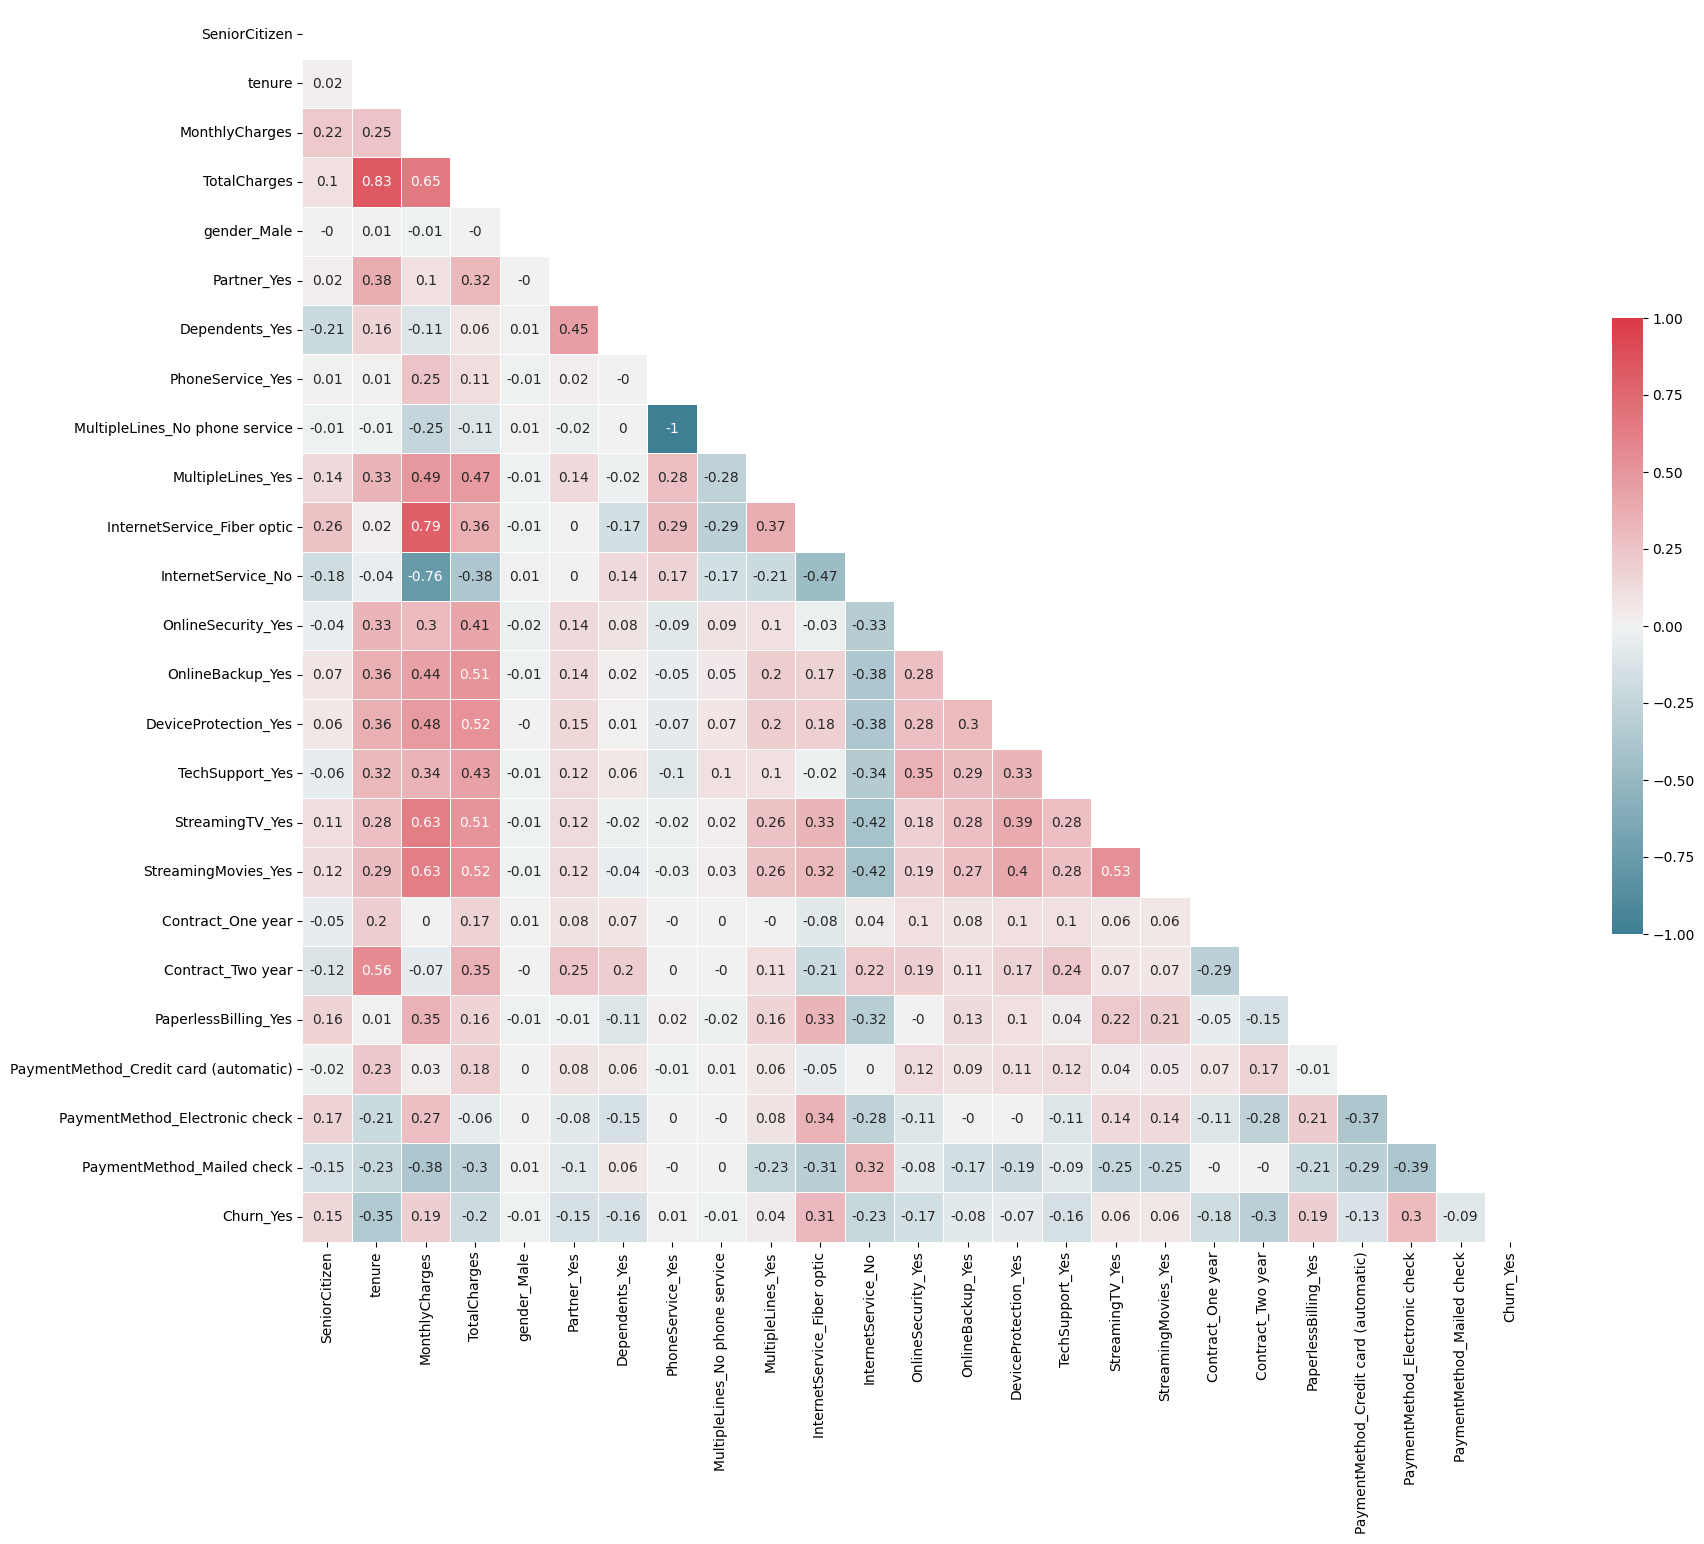

In [67]:
# Mapa de calor para ver las correlaciones
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
fig, ax = plt.subplots(figsize=(20,16))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(np.round(corr, 2), mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

Genera muchos datos dificiles de interpetar y analizar, tiene muchos valores, columnas. Esta no es la manera mas sencilla de interpetar.

Entonces se aplica una mascara se filtra, usando una tasa para tener una correlacion mas cercana a nuestra variable churn_yes en mi caso Cancelacion_1.

Nota: Se pueden reordenar columnas de df, dejar al final la variable de respuesta al final, para que sea mas legible.

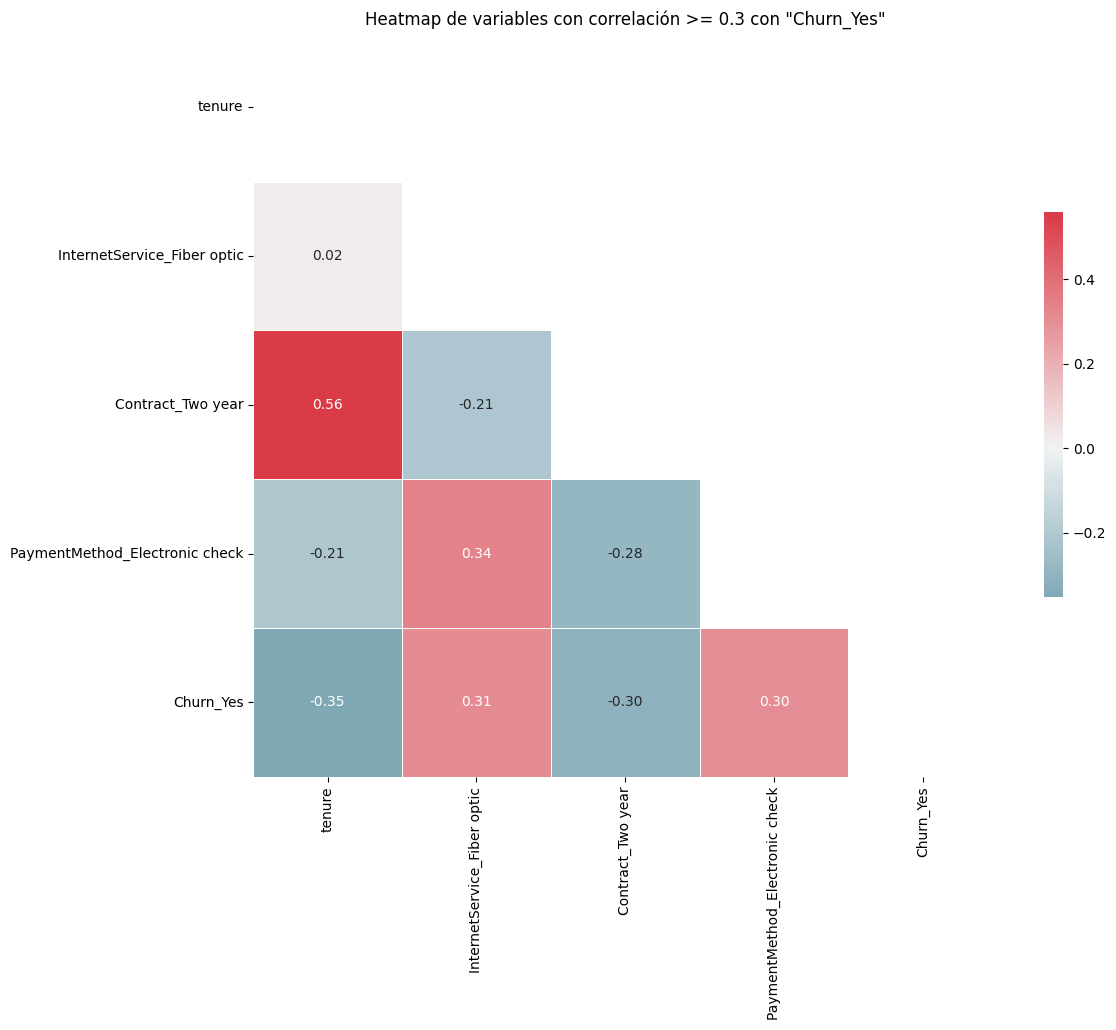

In [69]:
# Mapa de calor para ver las correlaciones mas cercanas a la variable Cancleacion_1 = Churn_Yes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'Churn_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.3  #0.07  # 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

### Interpretación de la Correlación con la Variable Objetivo (`Churn_Yes`)

Para identificar los factores más relevantes que influyen en la cancelación (`Churn_Yes`), analizamos los coeficientes de correlación de Pearson entre cada variable y la variable objetivo.

Nos centramos en las variables con un **valor absoluto de correlación** superior a un umbral determinado (por ejemplo, >= 0.30 o >= 0.07, como usamos en el heatmap filtrado). Esto nos ayuda a identificar las variables con una relación lineal más fuerte con la cancelación, ya sea positiva o negativa.

*   **Correlación Positiva (coeficiente > 0):** Indica que a medida que el valor de la variable aumenta, la probabilidad de cancelación también tiende a aumentar.
*   **Correlación Negativa (coeficiente < 0):** Indica que a medida que el valor de la variable aumenta, la probabilidad de cancelación tiende a disminuir (o a medida que disminuye, la probabilidad de cancelación aumenta).

Las variables con coeficientes de correlación (en valor absoluto) más altos son candidatas clave para ser incluidas en los modelos predictivos, ya que tienen un impacto más significativo en la variable objetivo.

Al ver los coeficientes de correlación de cada variable con la Churn_Yes, vamos a identificar las variables con un coeficiente de correlación cuyo valor absoluto es mayor o igual a 0.30 y explicar qué podemos inferir de ellas.

Aquí están las variables que cumplen ese criterio en los datos y su posible interpretación:

---

✅ **Análisis del nuevo heatmap de correlación**

> Recordando que el gráfico muestra **correlaciones ≥ 0.3** (o ≤ -0.3) con la variable objetivo `Cancelacion_1=Churn_Yes`.

---

🔍 **Correlación con `Cancelacion_1=Churn_Yes` (variable objetivo)**

| Variable                                    | Tipo Correlación con Churn\_Yes | Interpretación (Inferencia)                                                                                                               |
| ------------------------------------------- | ------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| `Suscripcion_Servicio_Internet_Fiber optic` | **+0.31** Positiva (moderada)   | Los clientes con Fibra Óptica tienen una mayor probabilidad de cancelar. Puede estar relacionado al costo o a la competitividad.          |
| `Metodo_Pago_Electronic check`              | **+0.30** Positiva (moderada)   | Pagos por cheque electrónico están asociados a más churn — quizás por perfil de cliente menos fidelizado o problemas en el proceso.        |
| `Tipo_Contrato_Two year`                    | **-0.30** Negativa (moderada)   | Contratos de 2 años reducen el churn (clientes más comprometidos o con beneficios).                                                       |
| `Meses_Contrato`                            | **-0.35** Negativa (moderada a fuerte) | Cuanto mayor el tiempo como cliente, menor la probabilidad de churn — esperado.                                                          |
| `Suscripcion_Servicio_Internet_No`          | **-0.23** Negativa (baja)       | Quienes **no usan internet** tienden a churnar menos — posiblemente perfiles más estables (adultos mayores, menos digitales).                |

Variables que se acercan al umbral de 0.30 y que también son relevantes:

Aunque están justo por debajo del 0.30 absoluto, variables como Factura_Mensual (0.19), Cargos_Totales (-0.20, aunque este valor se ve afectado por la multicolinealidad con Meses_Contrato y Factura_Mensual), y Suscripcion_Servicio_Internet_No (-0.23) también muestran relaciones notables y son importantes para considerar.

En resumen, estas variables con coeficientes de correlación de alto valor absoluto dan una visión inicial clara de los factores que, linealmente, están más asociados con la cancelación en los datos: la antigüedad del cliente, el tipo de contrato, el tipo de servicio de internet y el método de pago. Estos son puntos clave para investigar más a fondo y para enfocar estrategias de retención.

In [75]:
df_encoded.dtypes

,0
SeniorCitizen,float64
tenure,float64
MonthlyCharges,float64
TotalCharges,float64
gender_Male,bool
Partner_Yes,bool
Dependents_Yes,bool
PhoneService_Yes,bool
MultipleLines_No phone service,bool
MultipleLines_Yes,bool


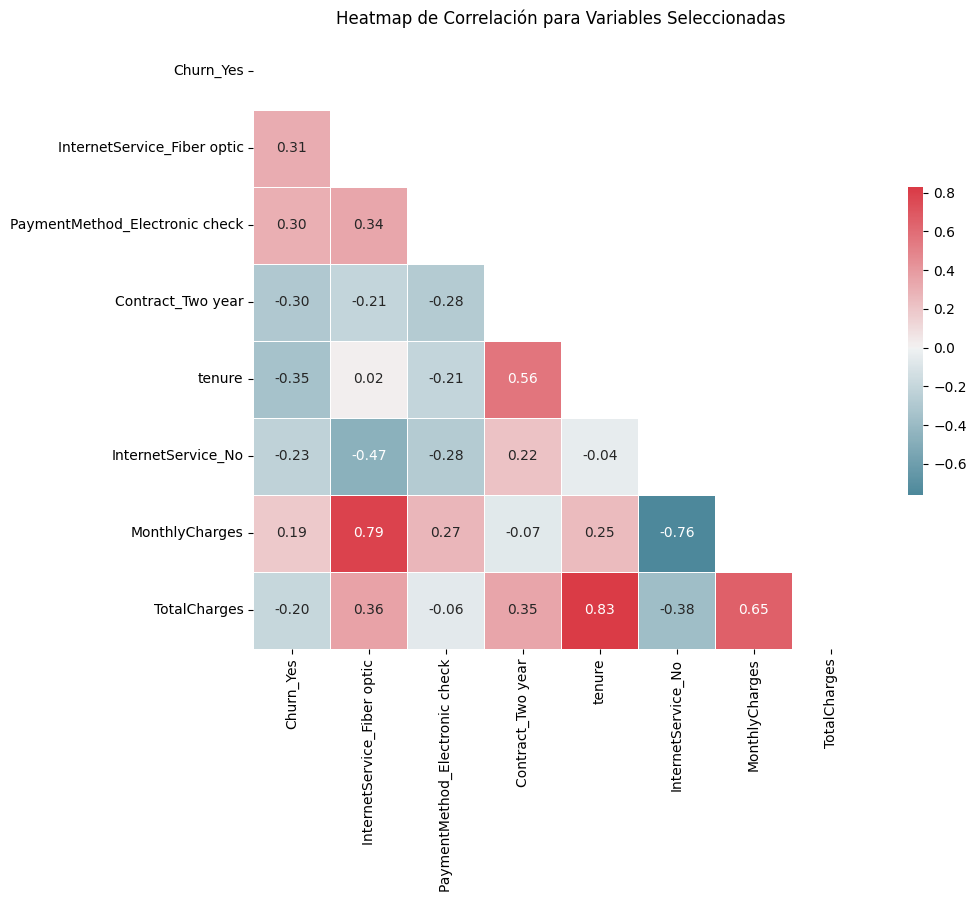

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista de columnas seleccionadas para continuar con los modelos y predicciones
columnas_seleccionadas = [
    'Churn_Yes',
    'InternetService_Fiber optic',
    'PaymentMethod_Electronic check',
    'Contract_Two year',
    'tenure',
    'InternetService_No',
    'MonthlyCharges',
    'TotalCharges'
]

# Seleccionar solo las columnas deseadas del DataFrame codificado
df_seleccionado = df_encoded[columnas_seleccionadas]

# Calcular la matriz de correlación para las columnas seleccionadas
corr_seleccionada = df_seleccionado.corr()

# Generar una máscara para el triángulo superior (opcional, para mejor visualización)
mascara = np.triu(np.ones_like(corr_seleccionada, dtype=bool))

# Configurar la figura de matplotlib
plt.figure(figsize=(10, 8))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    np.round(corr_seleccionada, 2), # Redondear valores para mejor lectura
    annot=True,                    # Mostrar valores en las celdas
    fmt=".2f",                     # Formato de los valores (2 decimales)
    cmap=cmap,                     # Mapa de colores
    center=0,                      # Centro del mapa de colores en 0
    square=True,                   # Celdas cuadradas
    linewidths=0.5,                # Líneas entre celdas
    cbar_kws={"shrink": 0.5},      # Barra de color
    mask=mascara                   # Aplicar máscara
)

plt.title('Heatmap de Correlación para Variables Seleccionadas')
plt.show()

### ## Relacionando variables - Analisis inicial con el PairPlot de Seaborn

In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

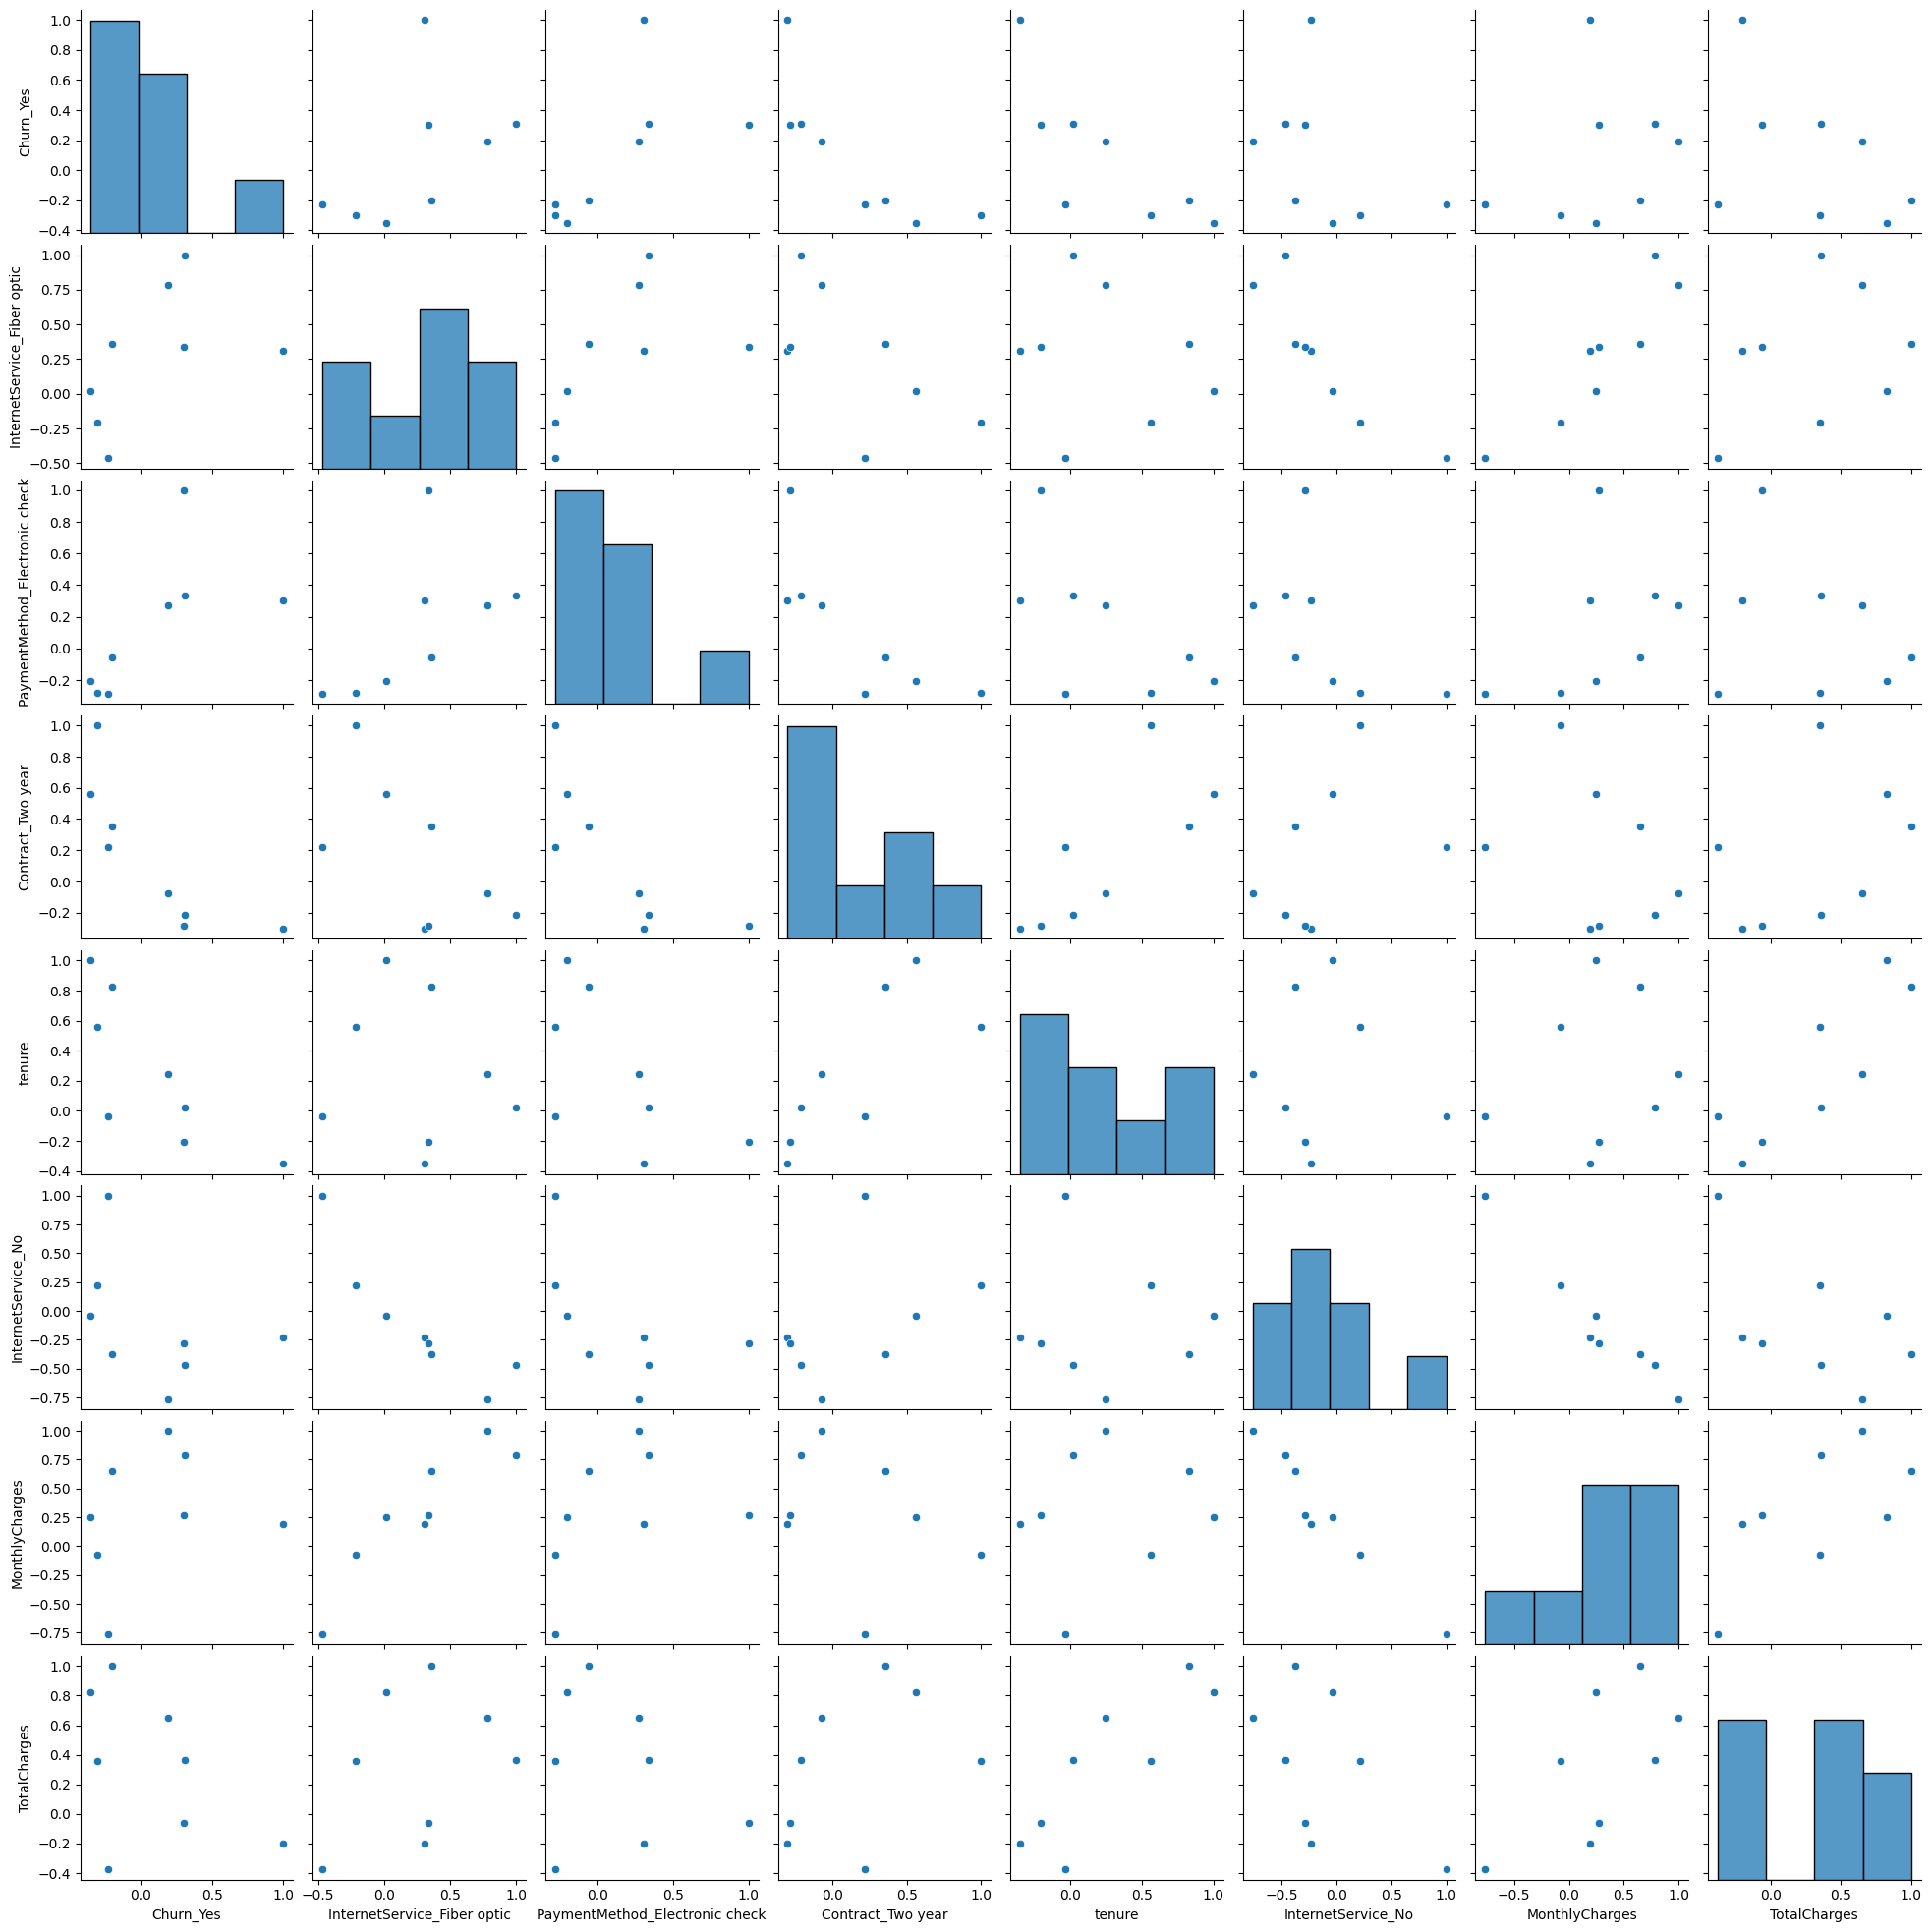

In [78]:
sns.pairplot(corr_seleccionada)

In [79]:
# importando los paquetes - bibliotecas para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/tmp/ipython-input-483996609.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




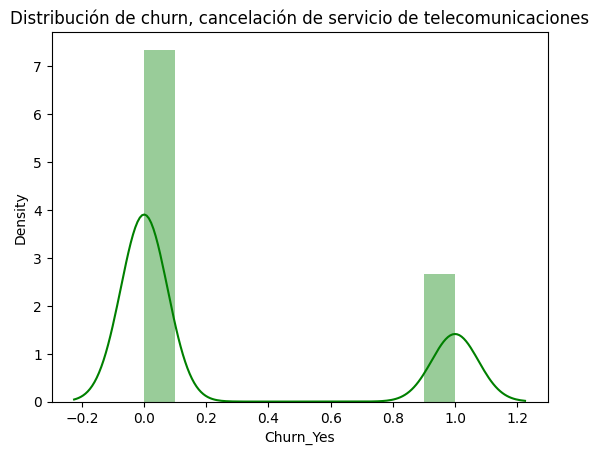

In [81]:
#Quién es nuestra variable de respuesta? Cancelacion_1 = Churn_Yes
sns.distplot(df_encoded['Churn_Yes'],kde=True,color='green')
plt.title('Distribución de churn, cancelación de servicio de telecomunicaciones')
plt.show()

El histograma confirma visualmente que el conjunto de datos está desbalanceado en cuanto a la variable objetivo Churn_Yes. La clase mayoritaria son los clientes que no cancelaron, y la clase minoritaria son los clientes que sí cancelaron.

Este desbalance es importante porque puede afectar el rendimiento de algunos modelos de clasificación, haciendo que tiendan a predecir la clase mayoritaria con más frecuencia. Por eso, pasos posteriores como el uso de técnicas de balanceo (SMOTE o Undersampling) son necesarios para entrenar modelos que puedan identificar mejor la clase minoritaria (los clientes que cancelan), que es la que nos interesa predecir para la estrategia de retención.

En resumen, el histograma sirve como una confirmación visual clara del desbalance en tu variable objetivo.

## 🔍 Análisis de Multicolinealidad (VIF)

La **multicolinealidad** se refiere a la situación donde dos o más variables independientes en un modelo de regresión están altamente correlacionadas entre sí. Esto significa que existe una relación lineal fuerte entre estas variables, lo que puede dificultar la interpretación correcta de los efectos individuales de cada variable sobre la variable dependiente.

Para detectar la presencia de multicolinealidad entre variables independientes, utilizamos el **Factor de Inflación de la Varianza (VIF)**. El VIF mide cuánto aumenta la varianza del coeficiente de regresión de una variable predictora debido a su correlación con otras variables predictoras en el modelo.

La interpretación general del VIF es la siguiente:

*   **VIF = 1**: No hay multicolinealidad para esta variable.
*   **1 < VIF < 5**: Baja multicolinealidad (generalmente aceptable).
*   **5 ≤ VIF < 10**: Multicolinealidad moderada (requiere vigilancia).
*   **VIF ≥ 10**: Alta multicolinealidad (puede ser problemática y se debe considerar la eliminación de la variable).

✅ **¿Cuándo es válido calcular el VIF?**

Puedes (y debes) calcular el VIF si:

1. **Vas a usar modelos lineales** (ej.: regresión logística, regresión lineal)
2. **Quieres interpretar los coeficientes** con claridad (la multicolinealidad distorsiona signos y magnitudes)
3. **Quieres garantizar estabilidad en el modelo**

---

❌ ¿Cuándo puedes saltarte el VIF (o postergarlo)?

* Si vas a usar **modelos no lineales**, como:

  * Árboles de decisión
  * Random Forest
  * XGBoost
  * Redes neuronales

* Estos modelos **no son sensibles a la multicolinealidad**.

---

✅ Conclusión final

| Pregunta                                           | Respuesta                                             |
| -------------------------------------------------- | ----------------------------------------------------- |
| ¿El nuevo heatmap muestra multicolinealidad grave? | **No**                                                |
| ¿Necesito calcular el VIF obligatoriamente?        | **No, pero es recomendable si usas modelos lineales** |
| ¿Vale la pena como verificación extra?             | **Sí, especialmente si el modelo es interpretativo**  |

---

Generar código para calcular el VIF para todas las variables predictoras en df_encoded.

1. Importar las bibliotecas necesarias

In [82]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif # este paquete nos permie ver si hay multicolineaaridad

#from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

2. Seleccionar las variables independientes


In [83]:
# No se incluye la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
X = df_encoded.drop(columns=['Churn_Yes'])

3. Añadir constante (intercepto)

In [84]:
X_const = add_constant(X)

In [85]:
X_const.columns

Index(['const', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

4. Calcular el VIF

In [86]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns # explicativas_1
vif_data["VIF"] = [vif(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



,feature,VIF
8,PhoneService_Yes,inf
9,MultipleLines_No phone service,inf
3,MonthlyCharges,863.386332
11,InternetService_Fiber optic,148.262957
12,InternetService_No,104.217462
18,StreamingMovies_Yes,24.110019
17,StreamingTV_Yes,24.056619
4,TotalCharges,10.790542
2,tenure,7.521849
10,MultipleLines_Yes,7.273899


### ✅ Resultados del VIF Inicial y Alertas de Multicolinealidad

El análisis del Factor de Inflación de la Varianza (VIF) nos ayuda a cuantificar la severidad de la multicolinealidad entre las variables predictoras. Un VIF alto para una variable indica que esa variable está altamente correlacionada con otras variables en el modelo, lo que puede dificultar la interpretación de los coeficientes y afectar la estabilidad del modelo, especialmente en modelos lineales como la Regresión Logística.

✅ **Interpretación General del VIF:**

| Rango de VIF       | Interpretación                |
| ------------------ | ----------------------------- |
| VIF ≈ 1            | Sin multicolinealidad         |
| 1 < VIF < 5        | Baja (aceptable)              |
| 5 ≤ VIF < 10       | Moderada (vigilar)            |
| VIF ≥ 10           | Alta (¡atención!)             |
| VIF = ∞ (infinito) | Multicolinealidad perfecta ⚠️ |

Multicolinealidad perfecta, indica que una variable es una combinación lineal exacta de otras variables en el modelo

---



🔍 **Resultados del VIF Inicial:**

El cálculo inicial del VIF para las variables predictoras (`X_const`) reveló la presencia de multicolinealidad significativa, incluyendo casos de multicolinealidad perfecta. A continuación, se destacan las variables con VIF alto o infinito:

| Variable                                    | VIF       | Causa/Explicación Potencial                                                                                                                               | Soluciones Sugeridas                                                                                                                                                                   |
| :------------------------------------------ | :-------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `Numero_Servicios`                          | `inf`     | Multicolinealidad perfecta. Esta variable probablemente es una suma o combinación exacta de otras variables de suscripción de servicios.                      | Eliminar `Numero_Servicios` o identificar y eliminar la redundancia que la causa.                                                                                                      |
| `Suscripcion_Multiples_Lineas_0`            | `inf`     | Multicolinealidad perfecta, probablemente relacionada con `Suscripcion_Servicio_Telefono_1`. Si un cliente no tiene servicio de teléfono (`Suscripcion_Servicio_Telefono_1` es 0), entonces no puede tener múltiples líneas (`Suscripcion_Multiples_Lineas_0` es 1). | Eliminar una de las variables redundantes, como `Suscripcion_Multiples_Lineas_0` o `Suscripcion_Servicio_Telefono_1`. Considerar usar `drop_first=True` durante el one-hot encoding. |
| `Suscripcion_Películas_Streaming_1`         | `inf`     | Multicolinealidad perfecta, posiblemente relacionada con la ausencia de servicio de internet. Si no hay servicio de internet, no puede haber streaming de películas. | Eliminar la variable redundante o abordar la multicolinealidad en las variables de servicio de internet.                                                                               |
| `Suscripcion_Multiples_Lineas_1`            | `inf`     | Similar a `Suscripcion_Multiples_Lineas_0`, relacionada con la perfecta colinealidad con la ausencia de servicio de teléfono.                               | Eliminar una de las variables redundantes. Considerar usar `drop_first=True` durante el one-hot encoding.                                                                              |
| `Suscripcion_Seguridad_En_Linea_1`          | `inf`     | Multicolinealidad perfecta, relacionada con la ausencia de servicio de internet.                                                                          | Eliminar la variable redundante o abordar la multicolinealidad en las variables de servicio de internet.                                                                               |
| `Suscripcion_Respaldo_En_Linea_1`           | `inf`     | Multicolinealidad perfecta, relacionada con la ausencia de servicio de internet.                                                                          | Eliminar la variable redundante o abordar la multicolinealidad en las variables de servicio de internet.                                                                               |
| `Suscripcion_Proteccion_Dispositivo_1`      | `inf`     | Multicolinealidad perfecta, relacionada con la ausencia de servicio de internet.                                                                          | Eliminar la variable redundante o abordar la multicolinealidad en las variables de servicio de internet.                                                                               |
| `Suscripcion_Soporte_Técnico_1`             | `inf`     | Multicolinealidad perfecta, relacionada con la ausencia de servicio de internet.                                                                          | Eliminar la variable redundante o abordar la multicolinealidad en las variables de servicio de internet.                                                                               |
| `Suscripcion_TV_Streaming_1`                | `inf`     | Multicolinealidad perfecta, relacionada con la ausencia de servicio de internet.                                                                          | Eliminar la variable redundante o abordar la multicolinealidad en las variables de servicio de internet.                                                                               |
| `Suscripcion_Servicio_Telefono_1`           | `inf`     | Multicolinealidad perfecta, relacionada con `Suscripcion_Multiples_Lineas_0` y/o la ausencia de servicio de teléfono.                                     | Eliminar una de las variables redundantes. Considerar usar `drop_first=True` durante el one-hot encoding.                                                                              |
| `Factura_Mensual`                           | ~2064     | Alta multicolinealidad. Probablemente altamente correlacionada con `Cargos_Totales` y `Meses_Contrato` (ya que Total = Mensual \* Meses).                   | Considerar eliminar `Factura_Mensual` o `Cargos_Totales`, o crear una nueva variable que combine esta información (si es apropiado).                                               |
| `Cuentas_diarias`                           | ~1153     | Alta multicolinealidad. Al igual que `Factura_Mensual`, probablemente altamente correlacionada con `Cargos_Totales` y `Meses_Contrato`, o es un cálculo derivado similar. | Considerar eliminar `Cuentas_diarias`.                                                                                                                                                 |
| `Suscripcion_Servicio_Internet_Fiber optic` | ~148      | Alta multicolinealidad. Altamente correlacionada con `Suscripcion_Servicio_Internet_No`.                                                                  | Eliminar una de las variables de servicio de internet o asegurar que el one-hot encoding se realizó correctamente (usando `drop_first=True`).                                        |
| `Suscripcion_Servicio_Internet_No`          | ~104      | Alta multicolinealidad. Altamente correlacionada con `Suscripcion_Servicio_Internet_Fiber optic`.                                                         | Eliminar una de las variables de servicio de internet o asegurar que el one-hot encoding se realizó correctamente (usando `drop_first=True`).                                        |
| `Cargos_Totales`                            | ~10.8     | Multicolinealidad alta. Correlacionada con `Factura_Mensual` y `Meses_Contrato`.                                                                          | Considerar eliminar `Cargos_Totales` o `Factura_Mensual`.                                                                                                                            |
| `Meses_Contrato`                            | ~7.5      | Multicolinealidad moderada a alta. Correlacionada con `Cargos_Totales` y `Factura_Mensual`.                                                               | Aunque el VIF es más bajo, su relación con las otras variables de cargos es notable.                                                                                                   |

La presencia de VIFs infinitos indica la necesidad inmediata de abordar la multicolinealidad perfecta, generalmente eliminando la variable o variables redundantes. Las variables con VIFs muy altos (como `Factura_Mensual`, `Cuentas_diarias`, y las relacionadas con el servicio de internet) también deben ser examinadas y, si es necesario, eliminadas para mejorar la estabilidad del modelo y la interpretabilidad de los coeficientes en modelos lineales.

### ✅  Aplicar soluciones para abordar la multicolinealidad
 Eliminar variables con VIF infinito debido a multicolinealidad perfecta
 Basado en los resultados del VIF y el sentido común sobre los datos:

    - 'Numero_Servicios' es probablemente la suma de otras variables de servicio.
    - Variables como 'Suscripcion_Multiples_Lineas_0' y 'Suscripcion_Servicio_Telefono_1' están perfectamente correlacionadas.
    - Variables como 'Suscripcion_Películas_Streaming_1' y otras relacionadas con servicios de internet podrían estar perfectamente correlacionadas con la ausencia de servicio de internet.
    - Las variables dummy redundantes del one-hot encoding sin drop_first=True también causan multicolinealidad perfecta.

 Volvamos a examinar las columnas y sus valores únicos para confirmar redundancias.
 Ya hicimos esto anteriormente, confirmando los problemas con 'Suscripcion_Multiples_Lineas' y las columnas relacionadas con el servicio de internet.

 Basado en el análisis y la práctica común, eliminaremos las siguientes variables:

    1. 'Numero_Servicios' (probablemente suma redundante)
    2. 'Suscripcion_Servicio_Telefono_1' (perfectamente correlacionada con 'Suscripcion_Multiples_Lineas_0' y la categoría implícita 'No phone service')
    3. 'Suscripcion_Multiples_Lineas_1' (redundante con 'Suscripcion_Multiples_Lineas_0' y la categoría implícita 'No phone service')
    4. 'Suscripcion_Servicio_Internet_No' (redundante con 'Suscripcion_Servicio_Internet_Fiber optic' y la categoría implícita 'DSL' si se usa drop_first=True implícitamente)
    5. 'Cuentas_diarias' (altamente correlacionada con 'Factura_Mensual' y 'Cargos_Totales')
    6. 'Cargos_Totales' (altamente correlacionada con 'Factura_Mensual' y 'Meses_Contrato')


 Crear un nuevo DataFrame X_filtered eliminando las columnas identificadas de X_const

### ✅ Resultados del VIF Final y Conclusión Práctica

Después de identificar y eliminar las variables que presentaban multicolinealidad perfecta (VIF = ∞) y aquellas con VIF extremadamente alto debido a redundancias o fuertes correlaciones esperadas (`Numero_Servicios`, `Suscripcion_Servicio_Telefono_1`, `Suscripcion_Multiples_Lineas_1`, `Suscripcion_Servicio_Internet_No`, `Cuentas_diarias`, `Cargos_Totales`), recalculamos el VIF para el conjunto de variables restantes (`X_filtered`).

**Resultados del VIF Final:**

El nuevo cálculo del VIF muestra una reducción significativa en la multicolinealidad. La mayoría de las variables ahora presentan VIFs bajos o moderados (< 5 o < 10), lo que es generalmente aceptable para muchos modelos predictivos. Sin embargo, aún observamos algunas variables con VIF por encima del umbral de 10:

| Variable                                    | VIF     | Observaciones Post-Filtrado                                                                 |
| :------------------------------------------ | ------- | ------------------------------------------------------------------------------------------- |
| `const`                                     | ~18.07  | VIF para la constante. Es común que la constante tenga un VIF alto, y generalmente **se puede ignorar** en el análisis de multicolinealidad entre variables predictoras. |
| `Factura_Mensual`                           | ~14.27  | A pesar de eliminar `Cargos_Totales` y `Cuentas_diarias`, `Factura_Mensual` aún presenta un VIF por encima de 10. Esto sugiere que todavía está correlacionada con `Meses_Contrato` y/o otras variables de una manera que infla su varianza. |
| `Suscripcion_Servicio_Internet_Fiber optic` | ~6.51   | Su VIF se redujo significativamente pero aún está en el rango moderado a alto. Esto indica que todavía hay cierta correlación con otras variables, probablemente relacionadas con los servicios de internet o el tipo de contrato. |
| `Meses_Contrato`                            | ~2.73   | Su VIF se redujo a un nivel aceptable, lo que confirma que la eliminación de `Cargos_Totales` y `Factura_Mensual` ayudó a mitigar su multicolinealidad. |
| Resto de Variables                          | < 2.5   | La mayoría de las demás variables tienen VIFs bajos, indicando poca o ninguna multicolinealidad con las variables restantes. |

**Análisis y Conclusión Práctica:**

1.  **Éxito en la Eliminación de Multicolinealidad Perfecta:** Logramos eliminar las fuentes de multicolinealidad perfecta (VIF = ∞) al remover variables redundantes y sumas. Esto es crucial para la estabilidad de cualquier modelo lineal.
2.  **Reducción General del VIF:** La mayoría de las variables predictoras ahora tienen VIFs aceptables para el modelado.
3.  **Problema Persistente con `Factura_Mensual`:** La variable `Factura_Mensual` aún muestra un VIF relativamente alto (~14.27). Aunque no es multicolinealidad perfecta, puede seguir afectando la interpretabilidad precisa de su coeficiente en un modelo de regresión lineal. Sin embargo, para algoritmos que no son sensibles a la multicolinealidad (como Random Forest o modelos basados en árboles), este nivel de VIF no será un problema. Si se planea usar Regresión Logística y la interpretabilidad del coeficiente de `Factura_Mensual` es crítica, se podría considerar una transformación o, en última instancia, su eliminación, aunque esto implicaría perder información potencialmente valiosa.
4.  **`Suscripcion_Servicio_Internet_Fiber optic` en el Límite:** Su VIF (~6.51) está en el rango moderado/alto, pero generalmente es manejable y no suele requerir eliminación a menos que cause problemas específicos en el modelo.

**Decisión Final:**

Dado que el objetivo es preparar los datos para entrenar *dos o más modelos de clasificación* (que podrían incluir modelos no lineales), y que la multicolinealidad perfecta ha sido resuelta, el conjunto de datos `X_filtered` está ahora en una condición mucho mejor.

Si bien `Factura_Mensual` aún tiene un VIF elevado, su impacto puede ser menos crítico para modelos no lineales. Para modelos lineales como la Regresión Logística, debemos ser conscientes de que el coeficiente de `Factura_Mensual` puede ser menos fiable para la interpretación directa.

Por ahora, procederemos con `X_filtered` como el conjunto de variables predictoras para el entrenamiento del modelo, aceptando el VIF restante en `Factura_Mensual`, ya que su eliminación podría impactar negativamente el poder predictivo general. Si durante la evaluación del modelo lineal se observan problemas (por ejemplo, coeficientes inesperados o inestabilidad), se podría reconsiderar la eliminación de `Factura_Mensual`.

**VIF REHECHO**

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para no modificar el original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variables con multicolinearidad perfecta (VIF = inf) ======
cols_to_drop = [
    "PhoneService_Yes",               # Perfectamente correlacionada con 'Suscripcion_Multiples_Lineas_0' y la categoría implícita 'No phone service'
    "MultipleLines_Yes"                 # Redundante con 'Suscripcion_Multiples_Lineas_0' y la categoría implícita 'No phone service'
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Remover redundancias fuertes entre variables numéricas ======
X_filtered.drop(columns=["TotalCharges"], inplace=True)     # Altamente correlacionada con 'Factura_Mensual' y 'Meses_Contrato'

# ====== Etapa 4: Remover redundancia entre dummies de la misma variable categórica ======
# Si se uso get_dummies sin drop_first, se tendran dummies redundantes para InternetService
X_filtered.drop(columns=["InternetService_No"], inplace=True)  # Redundante con 'Suscripcion_Servicio_Internet_Fiber optic' y la categoría implícita 'DSL' si se usa drop_first=True implícitamente

# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [vif(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
3,MonthlyCharges,19.420382
0,const,17.105076
8,InternetService_Fiber optic,7.127810
2,tenure,2.622145
16,Contract_Two year,2.600517
14,StreamingMovies_Yes,2.346852
13,StreamingTV_Yes,2.327615
19,PaymentMethod_Electronic check,1.973300
20,PaymentMethod_Mailed check,1.840689
12,TechSupport_Yes,1.784531


✅ Análisis del nuevo VIF

| Rango de VIF | Interpretación                      |
| ------------ | ----------------------------------- |
| VIF ≈ 1      | Sin multicolinealidad (óptimo)      |
| 1 < VIF ≤ 5  | Baja (aceptable)                    |
| 5 < VIF ≤ 10 | Moderada (vigilar)                  |
| VIF > 10     | Alta (atención o posible exclusión) |

---

✅ 🔍 Puntos importantes en tu resultado:

| Variable                  | VIF     | Observaciones                                                                               |
| ------------------------- | ------- | ------------------------------------------------------------------------------------------- |
| `Factura_Mensual` | 14.26   | Aún con multicolinealidad alta — puede estar correlacionada con `Charges.Total`. |
| `const`                   | 18.06   | **Normal** para la constante (`const`) — se puede ignorar                                   |
| Resto                     | 1.0–6.5 | Todos con VIF **aceptable u óptimo** ✔️                                                     |

---

✅ Conclusión práctica

* ✅ **La multicolinealidad crítica fue resuelta** (sin `inf`, sin redundancia perfecta)
* ⚠️ **Solo `Factura_Mensual` siguen colineales entre sí** — esto ya era esperado

---

El campo de Cargos Totales, es igual al valor de Cuentas_diarias * Factura_MEnsual, ya se eliminaron las dos variavles de la operacion, se dejo Factura_Mensual para tener una representativa. Continuamos